In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

In [17]:
G = fits.open('b1509_1700-3000.fits')
R = fits.open('b1509_500-1700.fits')
B = fits.open('b1509_3000-8000.fits')

In [18]:
# Import the necessary library
from astropy.io import fits

# Replace the path with your FITS file path
file_path = "b1509_3000-8000.fits"

# Open the FITS file
with fits.open(file_path) as hdul:
    # Access the header of the primary HDU (index 0)
    header = hdul[0].header
    
    # Print each header line
    for key, value in header.items():
        print(f"{key}: {value}")

SIMPLE: True
BITPIX: 16
NAXIS: 2
NAXIS1: 1200
NAXIS2: 1200
EXTEND: True
COMMENT:   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT:   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
HDUNAME: EVENTS_IMAGE
COMMENT:                               +------------------+
COMMENT:                               | AXAF FITS   File |
COMMENT:                               +------------------+
COMMENT:  *********************************************************
COMMENT:  >    This file is written following certain AXAF-ASC    <
COMMENT:  >    conventions which are documented in ASC-FITS-2.0   <
COMMENT:  *********************************************************
COMMENT:                        / Configuration control block--------------------
LONGSTRN: OGIP 1.0
COMMENT:   This FITS file may contain long string keyword values that are
COMMENT:   continued over multiple keywords.  The HEASARC convention uses the &
COMMENT:   character at the end of e

In [19]:
green_image = G[0].data
red_image = R[0].data
blue_image = B[0].data

In [20]:
norm_green = simple_norm(green_image, 'sqrt', percent=99.5)
norm_red = simple_norm(red_image, 'sqrt', percent=99.5)
norm_blue = simple_norm(blue_image, 'sqrt', percent=99.5)

green_image_norm = norm_green(green_image)
red_image_norm = norm_red(red_image)
blue_image_norm = norm_blue(blue_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


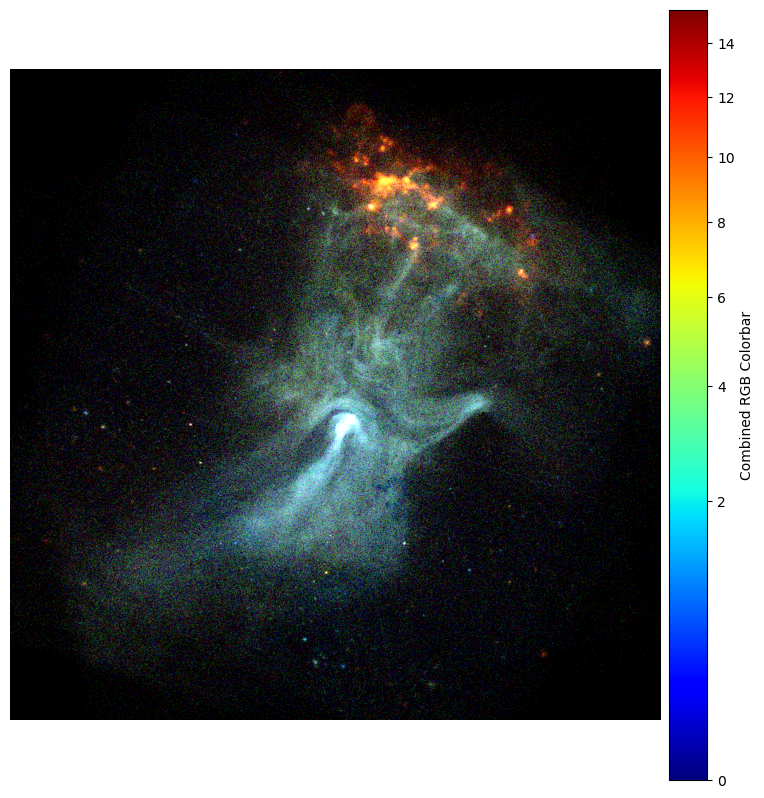

In [21]:
# Stack the images to create an RGB image
rgb_image = np.stack([red_image_norm, green_image_norm, blue_image_norm], axis=-1)

# Create a grayscale intensity image for the color bar
"""
It follows the standard method for converting RGB images to grayscale by applying the weights typically used in the RGB-to-grayscale conversion formula:

Red Channel Weight: 0.299
Green Channel Weight: 0.587
Blue Channel Weight: 0.114
This method accurately reflects the human eye's sensitivity to different colors, where green is the most sensitive and blue is the least.

"""
intensity_image = 0.299 * red_image_norm + 0.587 * green_image_norm + 0.114 * blue_image_norm

# Plot the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')

# Add a color bar based on the intensity image
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=simple_norm(intensity_image, 'sqrt'), cmap='jet'), ax=plt.gca(), orientation='vertical', pad=0.01)
cbar.set_label('Combined RGB Colorbar')

plt.axis('off')

plt.savefig('rgb_image_output.png')  # Save as PNG with 300 dpi resolution

plt.show()

# Close the FITS files
G.close()
R.close()
B.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


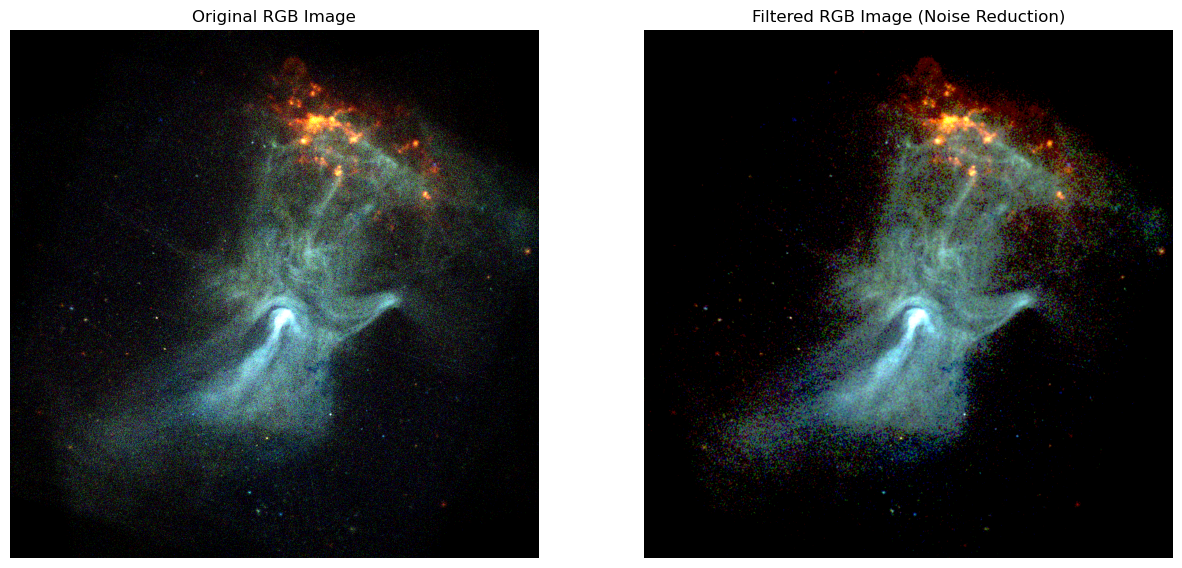

In [22]:
from scipy.ndimage import median_filter

# Apply median filter for noise reduction
# The size parameter defines the size of the neighborhood over which the filter is applied
filtered_red = median_filter(red_image_norm, size=3)
filtered_green = median_filter(green_image_norm, size=3)
filtered_blue = median_filter(blue_image_norm, size=3)

# Stack the images to create an RGB image
filtered_rgb_image = np.stack([filtered_red, filtered_green, filtered_blue], axis=-1)

# Plot the original and filtered images for comparison
plt.figure(figsize=(15, 15))

# Original Image
plt.subplot(1, 2, 1)
rgb_image = np.stack([red_image_norm, green_image_norm, blue_image_norm], axis=-1)
plt.imshow(rgb_image, origin='lower')
plt.title('Original RGB Image')
plt.axis('off')

# Filtered Image
plt.subplot(1, 2, 2)
plt.imshow(filtered_rgb_image, origin='lower')
plt.title('Filtered RGB Image (Noise Reduction)')
plt.axis('off')

plt.show()

# Close the FITS files
G.close()
R.close()
B.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


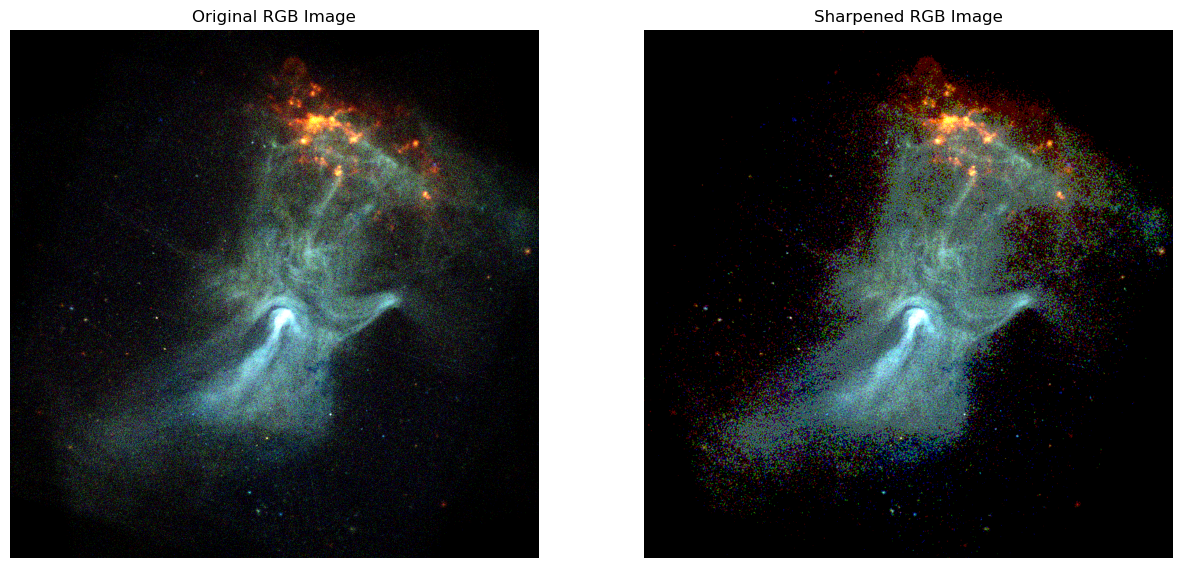

In [23]:
from scipy.ndimage import gaussian_filter, median_filter

# Unsharp Masking: Sharpening the Image
def unsharp_mask(image, sigma=1, strength=1.5):
    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)  # Clip to maintain valid intensity range

sharpened_red = unsharp_mask(filtered_red, sigma=1, strength=1.5)
sharpened_green = unsharp_mask(filtered_green, sigma=1, strength=1.5)
sharpened_blue = unsharp_mask(filtered_blue, sigma=1, strength=1.5)

# Stack the images to create an RGB image
sharpened_rgb_image = np.stack([sharpened_red, sharpened_green, sharpened_blue], axis=-1)

# Plot the original and sharpened images for comparison
plt.figure(figsize=(15, 15))

# Original Image (before sharpening)
plt.subplot(1, 2, 1)
original_rgb_image = np.stack([red_image_norm, green_image_norm, blue_image_norm], axis=-1)
plt.imshow(original_rgb_image, origin='lower')
plt.title('Original RGB Image')
plt.axis('off')

# Sharpened Image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_rgb_image, origin='lower')
plt.title('Sharpened RGB Image')
plt.axis('off')

plt.show()

# Close the FITS files
G.close()
R.close()
B.close()

FloatSlider(value=1.5, description='Strength:', max=5.0, min=0.1)

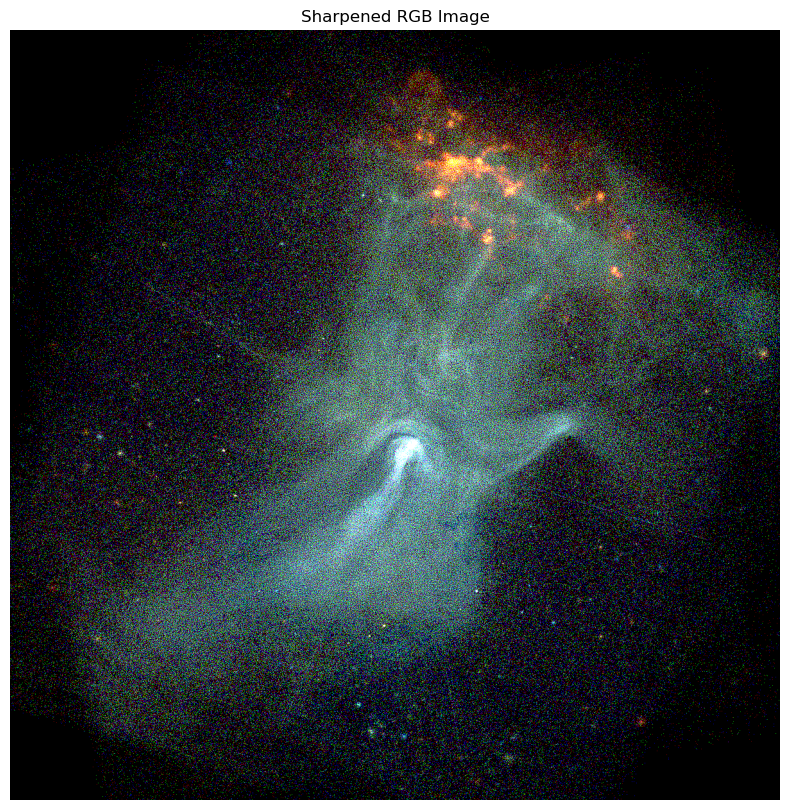

In [24]:
from scipy.ndimage import gaussian_filter
import ipywidgets as widgets
from IPython.display import display


# Unsharp Masking Function
def unsharp_mask(image, sigma=1, strength=1.5):
    blurred = gaussian_filter(image, sigma=sigma)
    sharpened = image + strength * (image - blurred)
    return np.clip(sharpened, 0, 1)

# Generate the initial sharpened image
initial_strength = 1.5
sharpened_rgb_image = np.stack([
    unsharp_mask(red_image_norm, sigma=1, strength=initial_strength),
    unsharp_mask(green_image_norm, sigma=1, strength=initial_strength),
    unsharp_mask(blue_image_norm, sigma=1, strength=initial_strength)
], axis=-1)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(sharpened_rgb_image, origin='lower')
ax.set_title('Sharpened RGB Image')
ax.axis('off')

# Slider setup
strength_slider = widgets.FloatSlider(value=initial_strength, min=0.1, max=5.0, step=0.1, description='Strength:')
display(strength_slider)

def update_image(change):
    strength = change['new']
    sharpened_rgb_image = np.stack([
        unsharp_mask(red_image_norm, sigma=1, strength=strength),
        unsharp_mask(green_image_norm, sigma=1, strength=strength),
        unsharp_mask(blue_image_norm, sigma=1, strength=strength)
    ], axis=-1)
    im.set_data(sharpened_rgb_image)
    fig.canvas.draw_idle()

strength_slider.observe(update_image, names='value')

plt.show()

# Close the FITS files
G.close()
R.close()
B.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


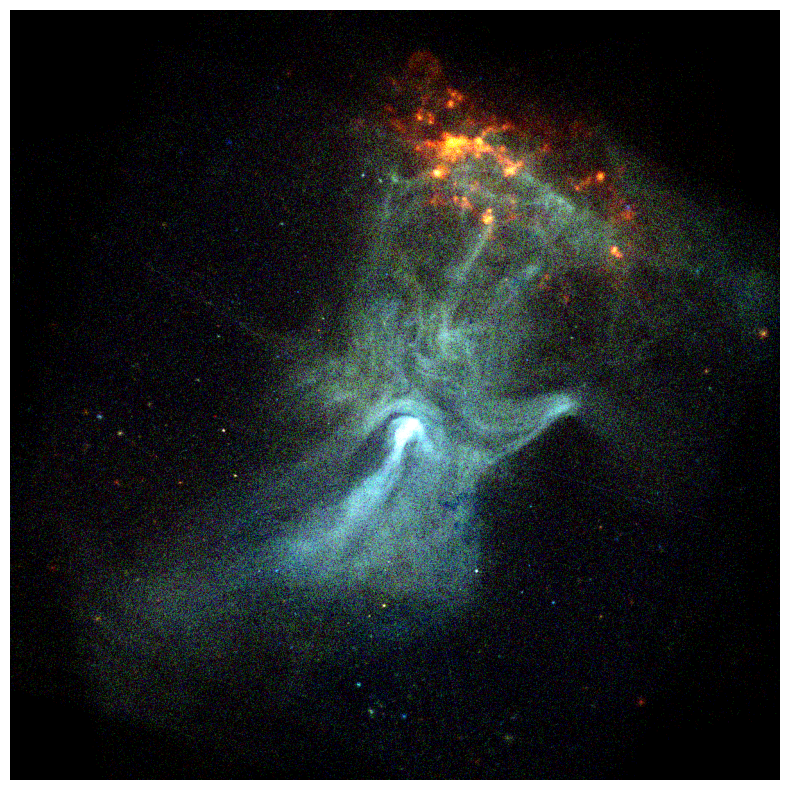

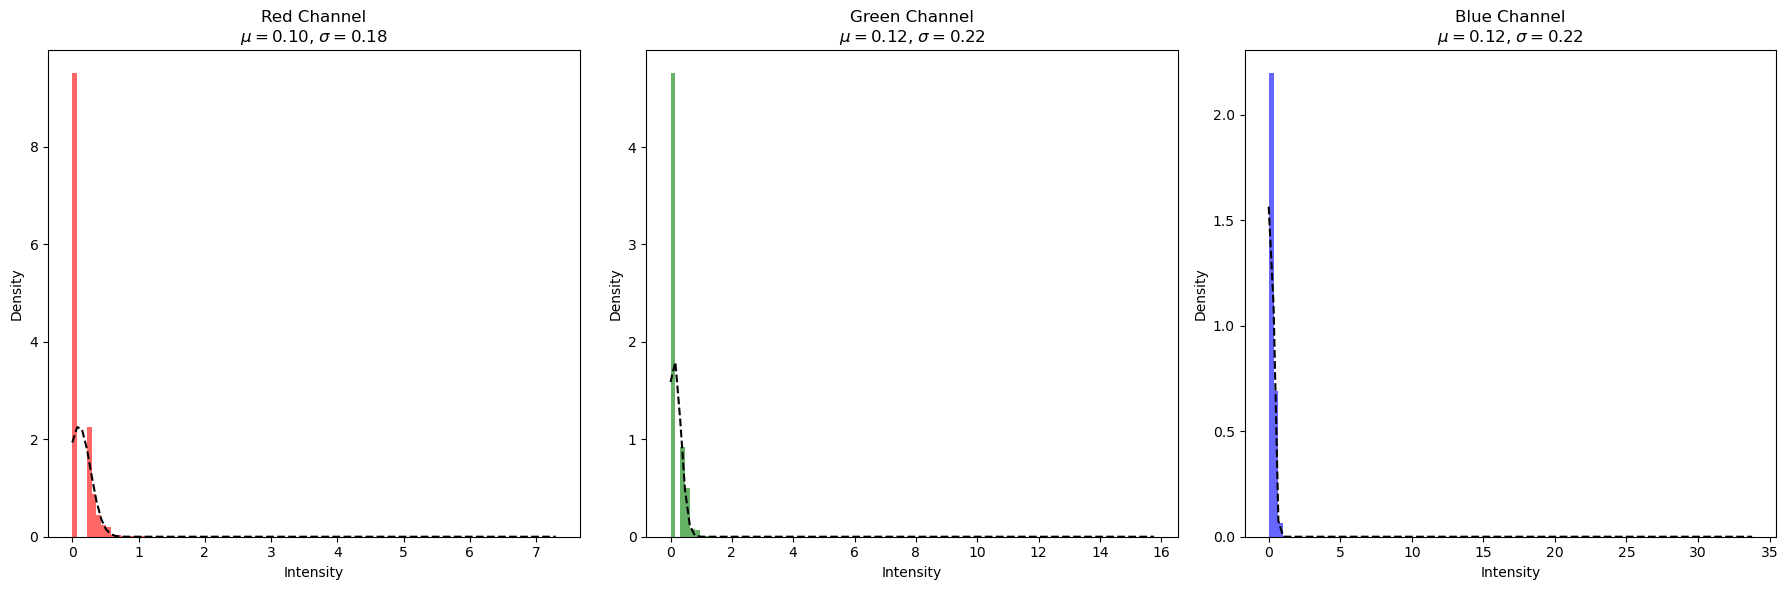

In [25]:
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from scipy.stats import norm

# Normalize the images
norm_green = simple_norm(green_image, 'sqrt', percent=99.5)
norm_red = simple_norm(red_image, 'sqrt', percent=99.5)
norm_blue = simple_norm(blue_image, 'sqrt', percent=99.5)

green_image_norm = norm_green(green_image)
red_image_norm = norm_red(red_image)
blue_image_norm = norm_blue(blue_image)

# Stack the images to create an RGB image
rgb_image = np.stack([red_image_norm, green_image_norm, blue_image_norm], axis=-1)

# Create a grayscale intensity image for the color bar
intensity_image = 0.299 * red_image_norm + 0.587 * green_image_norm + 0.114 * blue_image_norm

# Plot the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.axis('off')
plt.show()

# Extract color values for histograms
red_values = red_image_norm.flatten()
green_values = green_image_norm.flatten()
blue_values = blue_image_norm.flatten()

# Plot histograms and Gaussian fits
plt.figure(figsize=(18, 6))

for i, (color_values, color_name) in enumerate(zip([red_values, green_values, blue_values], ['Red', 'Green', 'Blue'])):
    plt.subplot(1, 3, i+1)
    
    # Plot the histogram
    counts, bins, _ = plt.hist(color_values, bins=100, density=True, alpha=0.6, color=color_name.lower())
    
    # Fit a Gaussian to the histogram
    mu, sigma = norm.fit(color_values)
    best_fit_line = norm.pdf(bins, mu, sigma)
    
    # Plot the Gaussian fit
    plt.plot(bins, best_fit_line, '--', color='black')
    
    plt.title(f'{color_name} Channel\n$\mu={mu:.2f}$, $\sigma={sigma:.2f}$')
    plt.xlabel('Intensity')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Close the FITS files
G.close()
R.close()
B.close()

Reference: Bhowmik, T., Islam, M. D., Tasneem, K. N., Roy, R., & Shahariar, R. (2024). Image Processing and Analysis of Multiple Wavelength Astronomical Data Using Python Tools. arXiv preprint arXiv:2410.06573.